热陷阱、热逃逸、热升级的图示

In [1]:
import numpy as np
import pickle

city = 'shanghai'
time = '2018' + '09' + '20'

TLM = np.load(f'./tmp_map/tmp_level_matrix_{city}_{time}.npy') # tmp_level_matrix

with open(f'./user_move/move_{city}_{time}_1200.pkl', 'rb') as f:
    user_move = pickle.load(f)

In [2]:
record_Traps = []
record_Escapes = []
record_Escalates = []

heat_users_i = [] # 12:00时处于高热时刻的uid
heat_users_i_2 = [] # 14:00时处于高热时刻的uid
cool_users_i = [] # 12:00时处于高热时刻的uid
cool_users_i_2 = [] # 14:00时处于高热时刻的uid

for uid, move in user_move.items():
    xi, yi, xi_2, yi_2 = move

    if TLM[yi, xi] in [5, 6]: # 12:00时处于高热时刻
        heat_users_i.append(uid)

        if TLM[yi_2, xi_2] in [5, 6]: # 热陷阱（Heat Traps）：高热区居民访问其他高热区
            record_Traps.append(uid)
        elif TLM[yi_2, xi_2] in [1, 2, 3]: # 热逃逸（Heat Escapes）：高热区居民访问低温区
            record_Escapes.append(uid)
    
    elif TLM[yi, xi] in [1, 2, 3]:
        cool_users_i.append(uid)

        if TLM[yi_2, xi_2] in [5, 6]:
            record_Escalates.append(uid)
    
    if TLM[yi_2, xi_2] in [5, 6]: # 14:00时处于高热时刻
        heat_users_i_2.append(uid)
    
    elif TLM[yi_2, xi_2] in [1, 2, 3]:
        cool_users_i_2.append(uid)

In [3]:
print(f'热冷比 12:00：{len(heat_users_i) / len(cool_users_i):.2%}')
print(f'热冷比 14:00：{len(heat_users_i_2) / len(cool_users_i_2):.2%}')
print('\n')
print(f'热陷阱比：{len(record_Traps) / len(heat_users_i):.2%}')
print(f'热逃逸比：{len(record_Escapes) / len(heat_users_i):.2%}')
print(f'热升级比：{len(record_Escalates) / len(cool_users_i):.2%}')

热冷比 12:00：548.95%
热冷比 14:00：543.60%


热陷阱比：87.48%
热逃逸比：1.39%
热升级比：7.25%


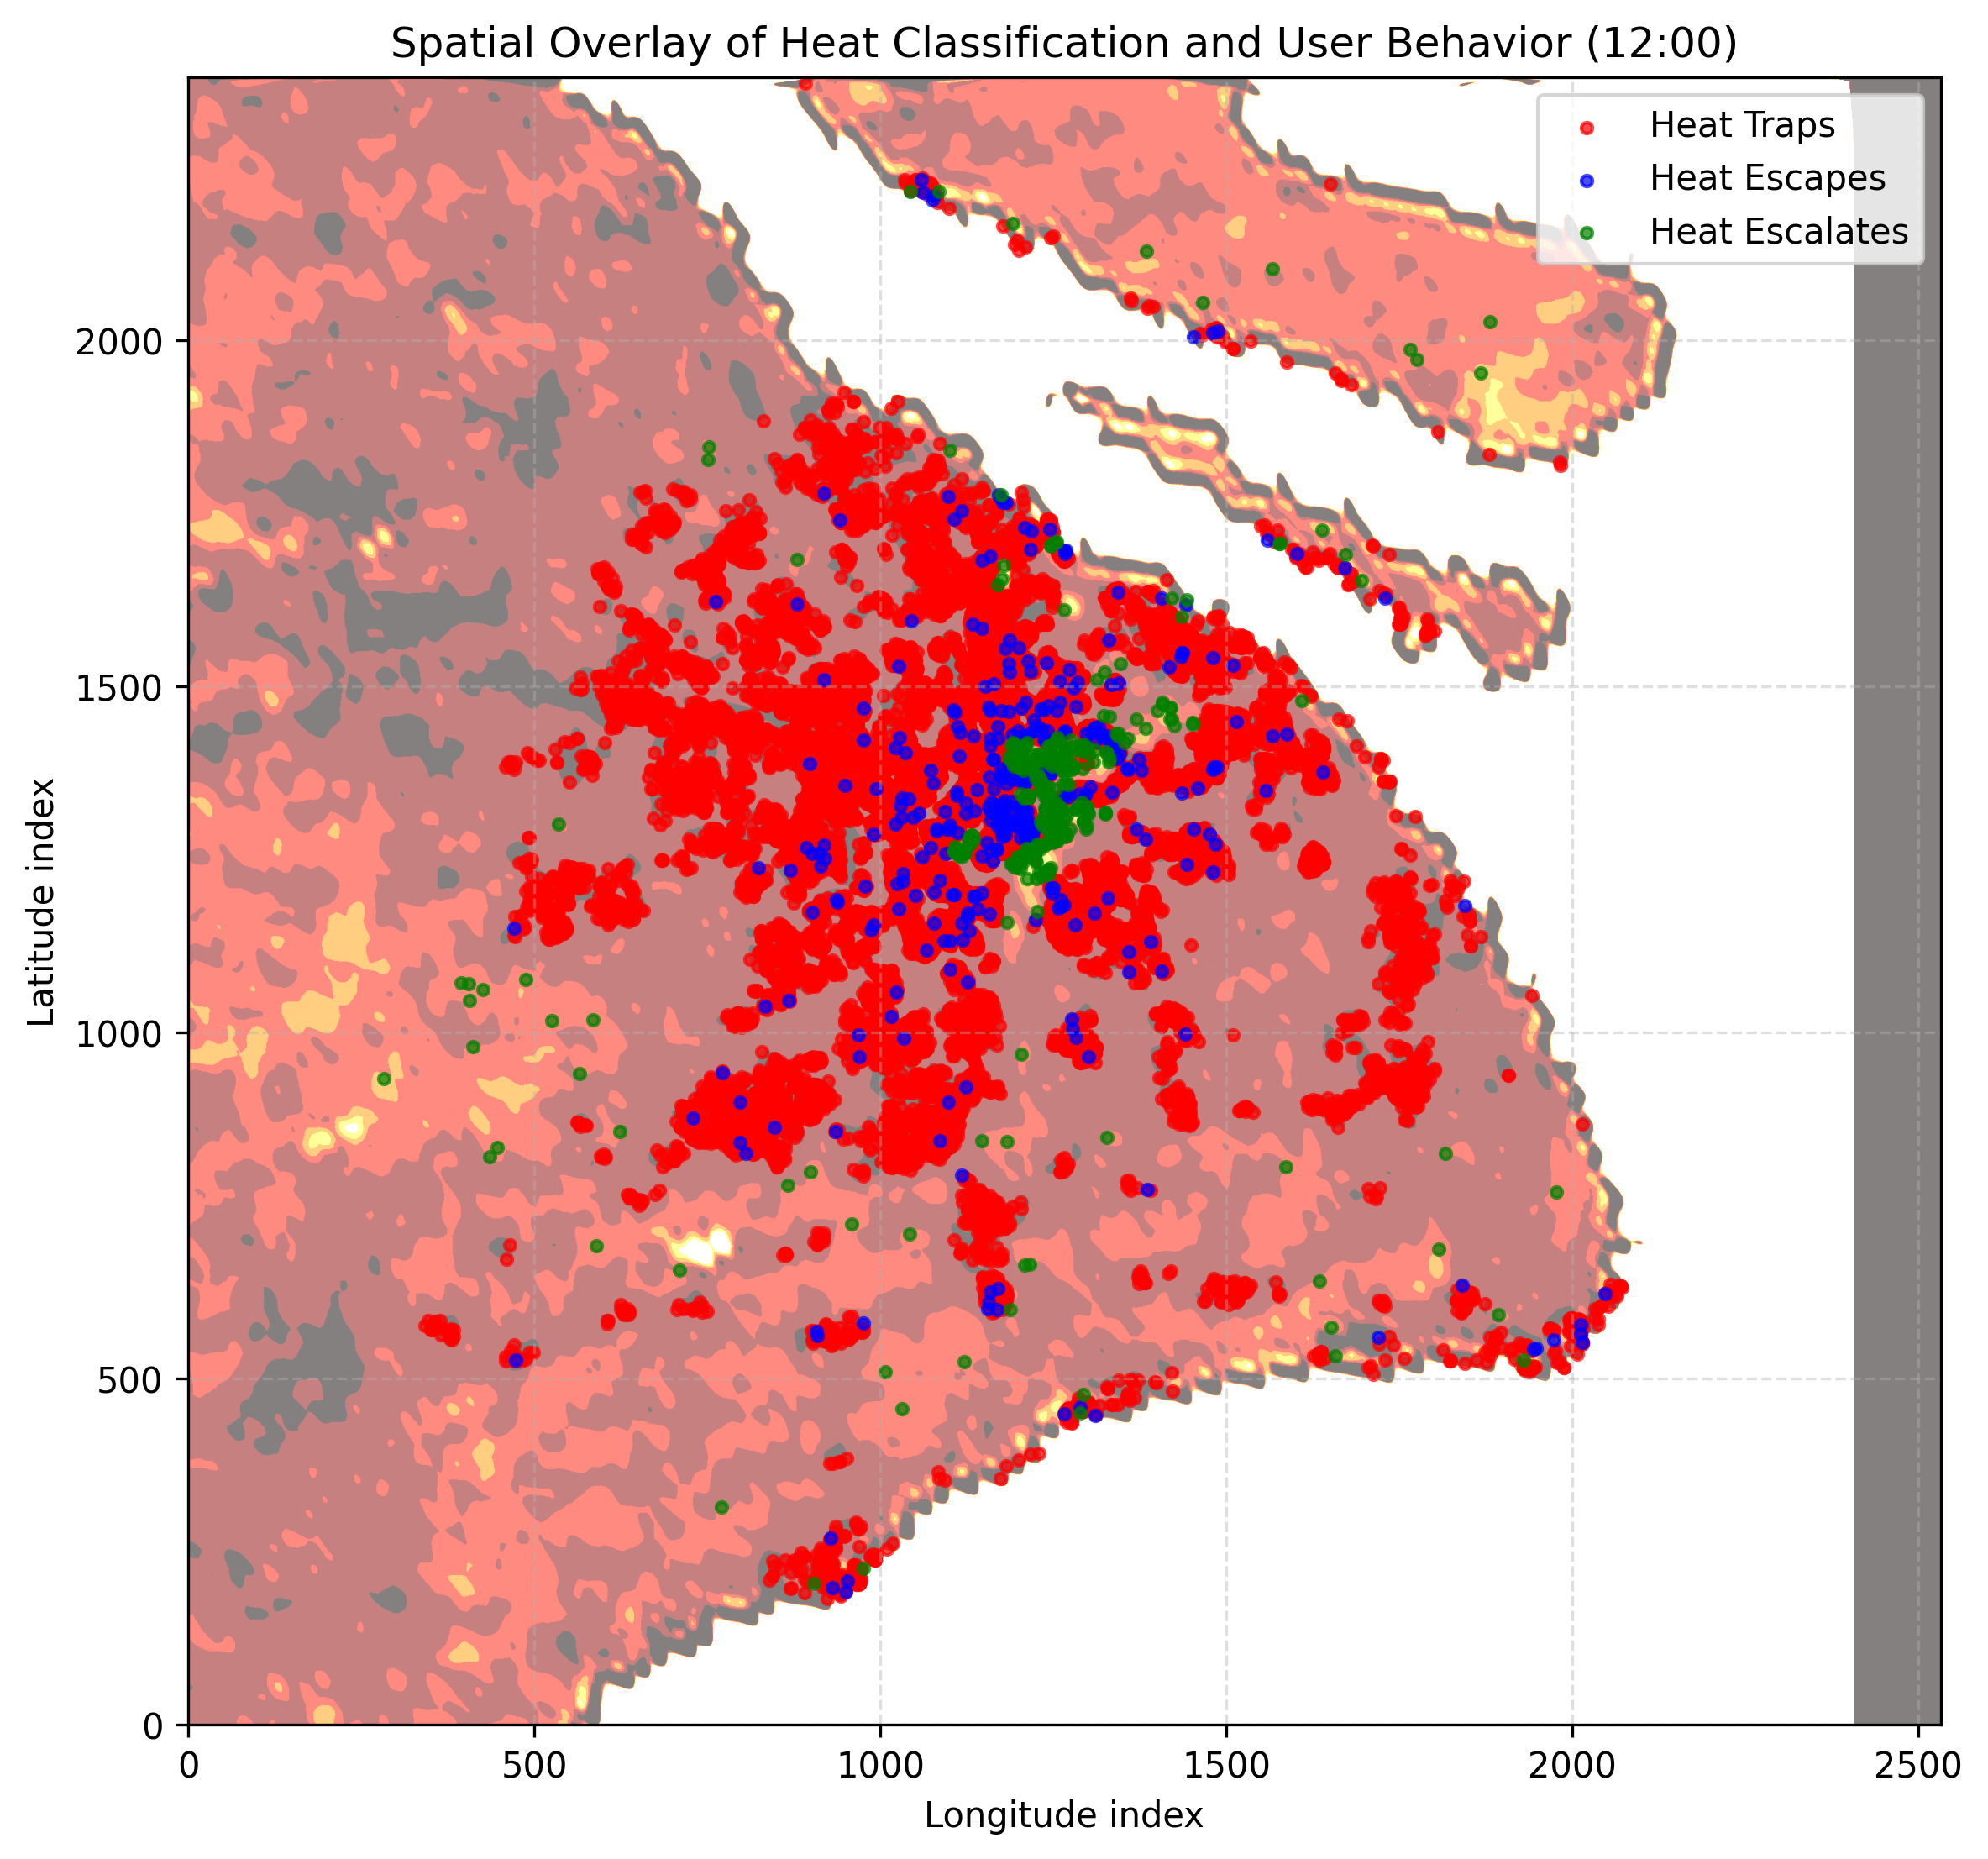

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 TLM 为 2D numpy 数组，表示热度等级，shape 与格网一致
# user_move 是一个 dict：uid -> (xi, yi, xi_2, yi_2)
# 热用户 UID 分别在 record_Traps、record_Escapes、record_Escalates 中

# 准备坐标数据（12:00时）
trap_coords = np.array([user_move[uid][:2] for uid in record_Traps])
escape_coords = np.array([user_move[uid][:2] for uid in record_Escapes])
escalate_coords = np.array([user_move[uid][:2] for uid in record_Escalates])

# 绘图
plt.figure(figsize=(10, 8), dpi=300)

# 1️⃣ 热度分级背景图（透明）
plt.imshow(
    TLM,
    origin='lower',
    cmap='hot_r',
    vmin=0,
    vmax=5,  # 假设最高为5级（可根据实际改）
    alpha=0.5  # 设置背景透明度
)

# 2️⃣ 点云叠加（scatter）
if len(trap_coords) > 0:
    plt.scatter(trap_coords[:, 0], trap_coords[:, 1], c='red', label='Heat Traps', s=10, alpha=0.7)
if len(escape_coords) > 0:
    plt.scatter(escape_coords[:, 0], escape_coords[:, 1], c='blue', label='Heat Escapes', s=10, alpha=0.7)
if len(escalate_coords) > 0:
    plt.scatter(escalate_coords[:, 0], escalate_coords[:, 1], c='green', label='Heat Escalates', s=10, alpha=0.7)

# 样式美化
plt.title('Spatial Overlay of Heat Classification and User Behavior (12:00)')
plt.xlabel('Longitude index')
plt.ylabel('Latitude index')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

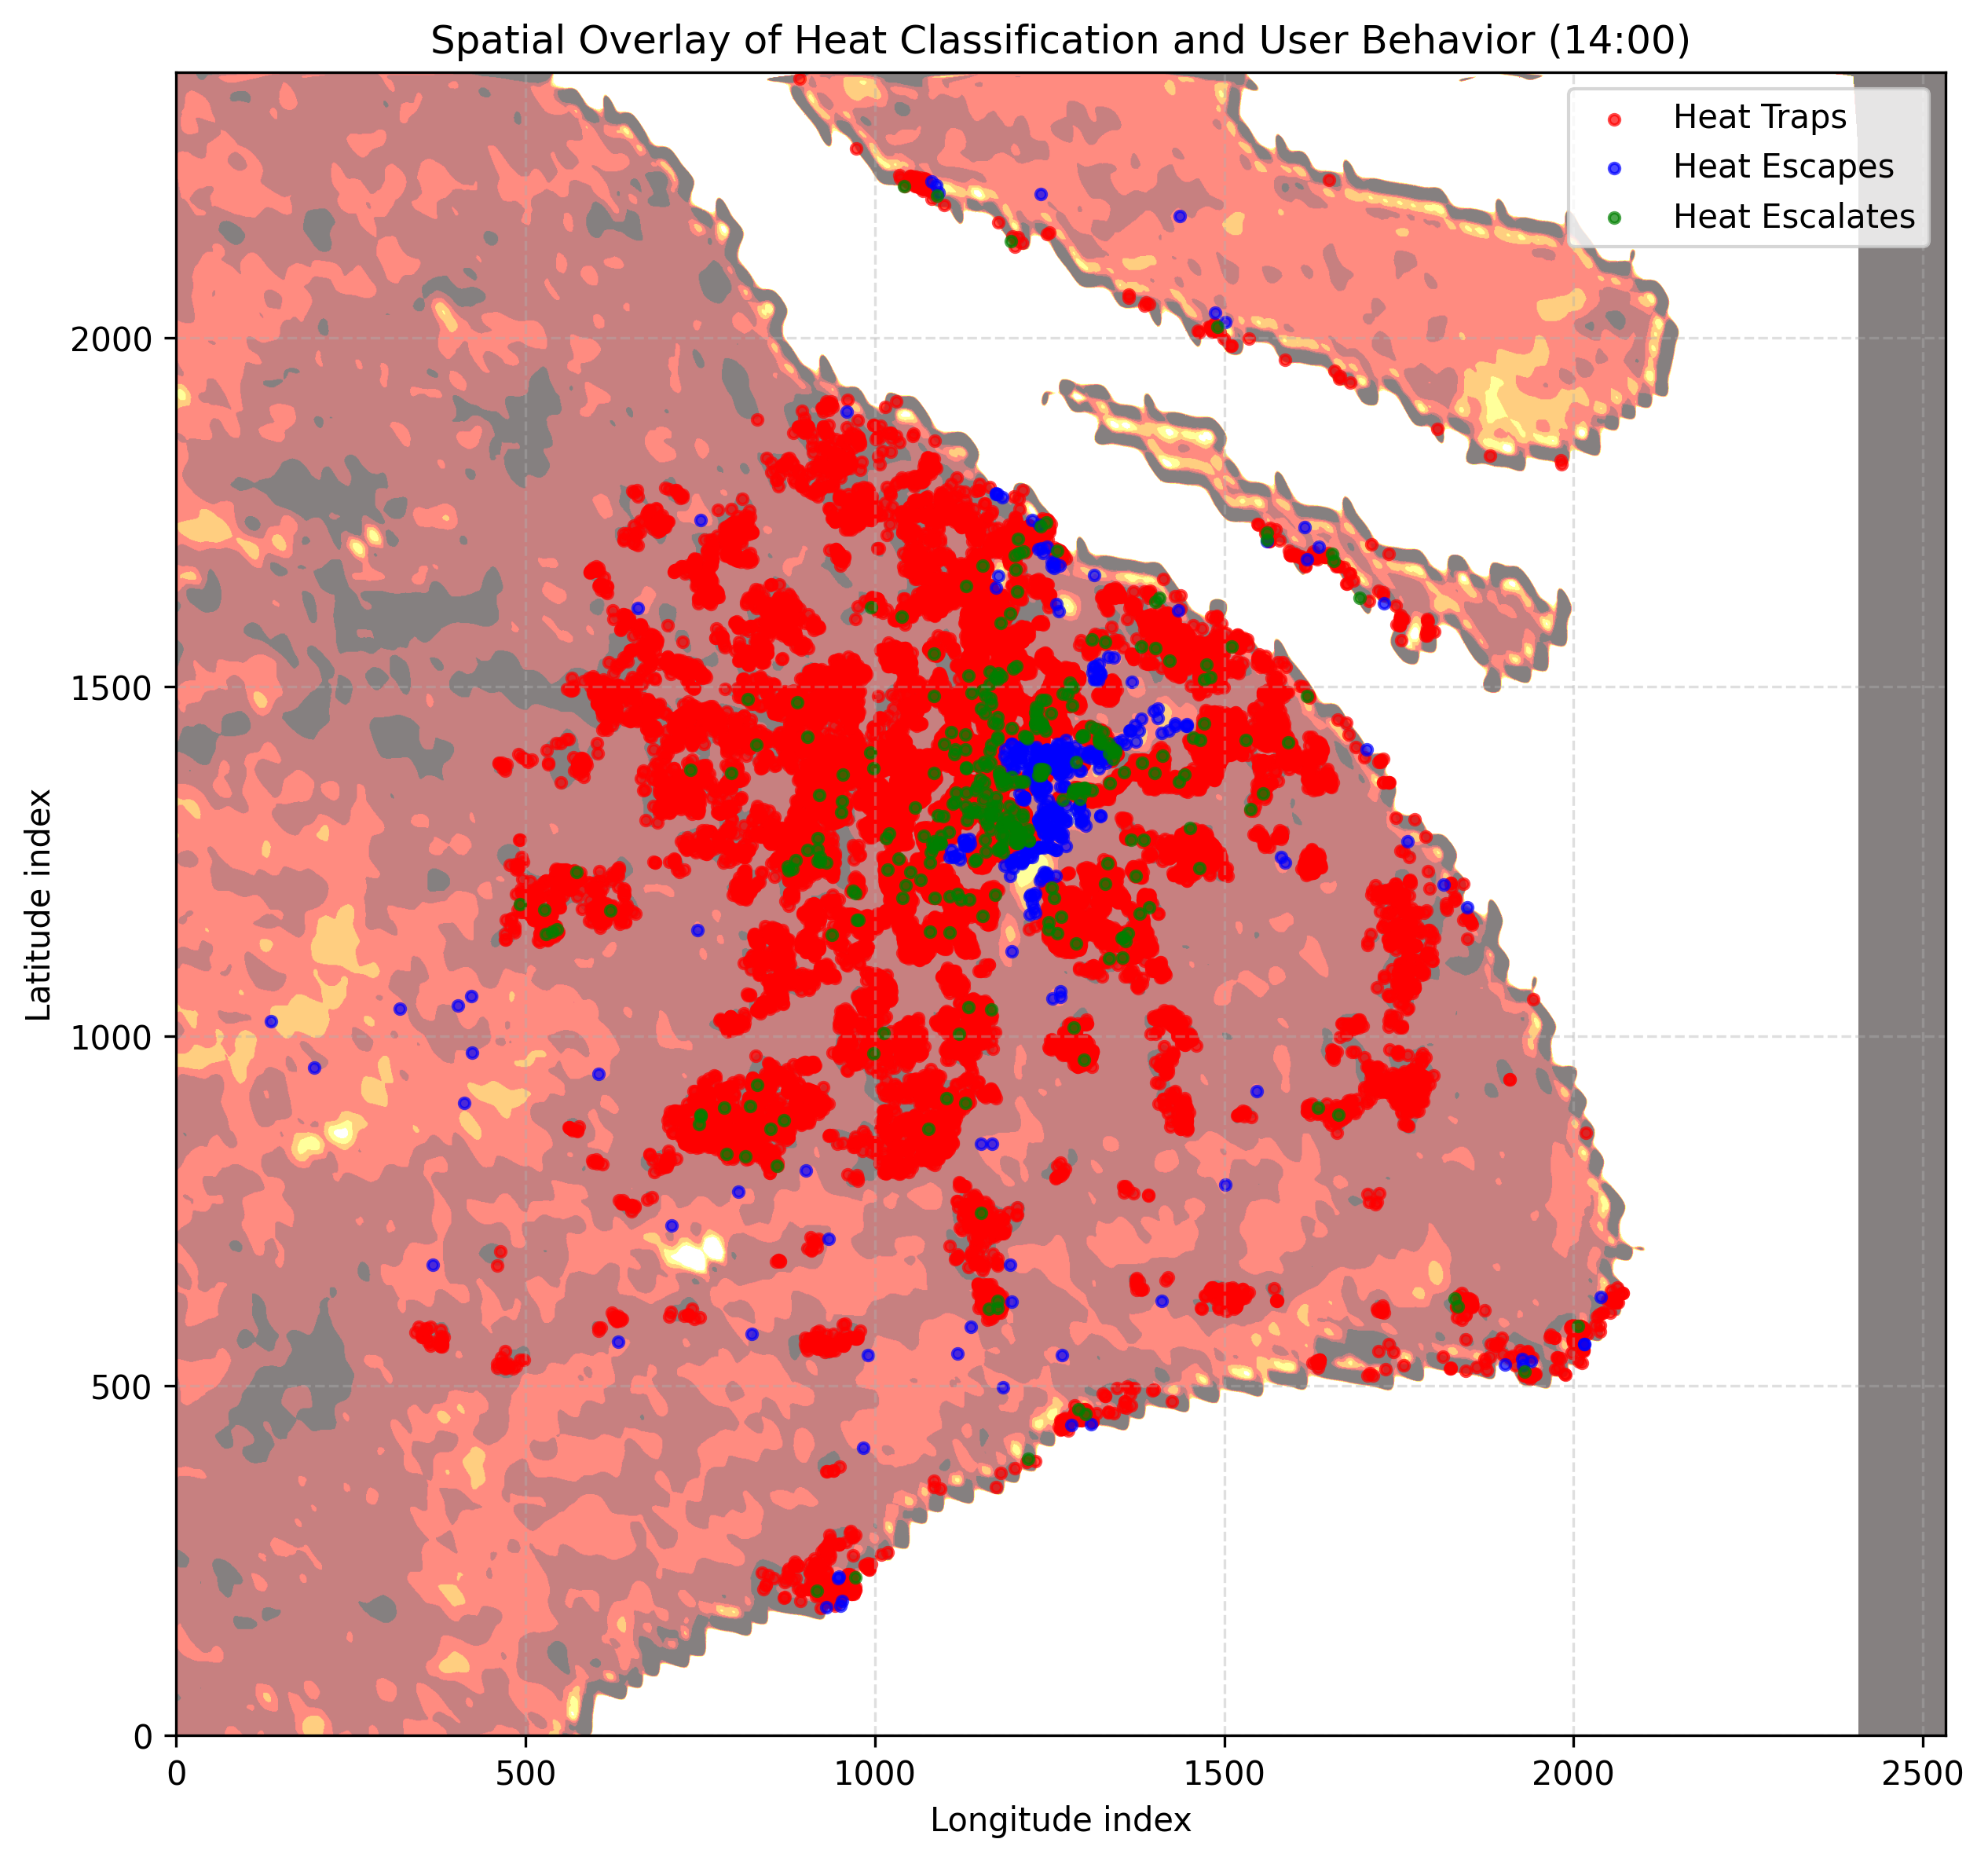

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 TLM 为 2D numpy 数组，表示热度等级，shape 与格网一致
# user_move 是一个 dict：uid -> (xi, yi, xi_2, yi_2)
# 热用户 UID 分别在 record_Traps、record_Escapes、record_Escalates 中

# 准备坐标数据（12:00时）
trap_coords = np.array([user_move[uid][2:] for uid in record_Traps])
escape_coords = np.array([user_move[uid][2:] for uid in record_Escapes])
escalate_coords = np.array([user_move[uid][2:] for uid in record_Escalates])

# 绘图
plt.figure(figsize=(10, 8), dpi=300)

# 1️⃣ 热度分级背景图（透明）
plt.imshow(
    TLM,
    origin='lower',
    cmap='hot_r',
    vmin=0,
    vmax=5,  # 假设最高为5级（可根据实际改）
    alpha=0.5  # 设置背景透明度
)

# 2️⃣ 点云叠加（scatter）
if len(trap_coords) > 0:
    plt.scatter(trap_coords[:, 0], trap_coords[:, 1], c='red', label='Heat Traps', s=10, alpha=0.7)
if len(escape_coords) > 0:
    plt.scatter(escape_coords[:, 0], escape_coords[:, 1], c='blue', label='Heat Escapes', s=10, alpha=0.7)
if len(escalate_coords) > 0:
    plt.scatter(escalate_coords[:, 0], escalate_coords[:, 1], c='green', label='Heat Escalates', s=10, alpha=0.7)

# 样式美化
plt.title('Spatial Overlay of Heat Classification and User Behavior (14:00)')
plt.xlabel('Longitude index')
plt.ylabel('Latitude index')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()